In [18]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import datetime as dt

In [19]:
yahoo_finance_1 = pd.read_csv('Yahoo.csv')
print(yahoo_finance_1)

            Date       Open       High        Low      Close  Adj Close  \
0     2016-05-27  22.850000  23.320000  22.850000  23.209999  21.825720   
1     2016-05-31  23.309999  23.740000  23.180000  23.540001  22.136036   
2     2016-06-01  23.400000  23.670000  23.320000  23.650000  22.239477   
3     2016-06-02  23.760000  23.879999  23.670000  23.790001  22.371130   
4     2016-06-03  23.639999  23.730000  23.350000  23.400000  22.004391   
...          ...        ...        ...        ...        ...        ...   
1253  2021-05-20  37.570000  38.209999  37.380001  37.950001  37.950001   
1254  2021-05-21  38.139999  38.430000  38.029999  38.250000  38.250000   
1255  2021-05-24  38.340000  38.610001  38.180000  38.250000  38.250000   
1256  2021-05-25  38.230000  38.419998  37.220001  37.230000  37.230000   
1257  2021-05-26  37.230000  37.700001  37.099998  37.490002  37.490002   

      Volume  
0     290500  
1      82600  
2      61800  
3      62900  
4      32200  
...      

In [20]:
yahoo_finance_1["Data"] = pd.to_datetime(yahoo_finance_1["Date"])
yahoo_finance_1.set_index("Date", inplace=True)
yahoo_finance_1 = yahoo_finance_1.set_index("Data")
yahoo_finance_1['Rolling mean'] = yahoo_finance_1.iloc[:,1].rolling(window=1).mean()
yahoo_finance.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-27,22.850000,23.320000,22.85,23.209999,21.825720,290500
1,2016-05-31,23.309999,23.740000,23.18,23.540001,22.136036,82600
2,2016-06-01,23.400000,23.670000,23.32,23.650000,22.239477,61800
3,2016-06-02,23.760000,23.879999,23.67,23.790001,22.371130,62900
4,2016-06-03,23.639999,23.730000,23.35,23.400000,22.004391,32200


<AxesSubplot:title={'center':'Yahoo finance Pandas'}, xlabel='Data'>

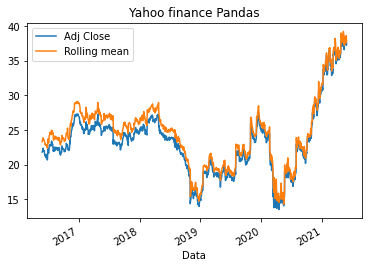

In [21]:
#Plot with Pandas

yahoo_finance_close = yahoo_finance_1["Adj Close"]
yahoo_finance_rolling_mean = yahoo_finance_1["Rolling mean"]
yahoo_finance_close.plot(title='Yahoo finance Pandas', legend = True);yahoo_finance_rolling_mean.plot(legend = True)

In [22]:
#Plot with Altair

yahoo_finance_2 = pd.read_csv('Yahoo.csv')

line = alt.Chart(yahoo_finance_2).mark_line(
    color='yellow',
    size=3
).transform_window(
    rolling_mean='mean(Adj Close)',
    frame=[-15, 15]
).encode(
    x='Date:T',
    y='rolling_mean:Q'
)
                
points = alt.Chart(yahoo_finance_2).mark_point().encode(
    x='Date:T',
    y=alt.Y('Adj Close:Q',
            axis=alt.Axis(title='Adj Close'))
)
points + line

alt.LayerChart(...)